# Credit Score Classsification
---

# Installs
---

In [3]:
!pip install -q autoviz
!pip install -q -U --pre pycaret

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [97 lines of output]
      INFO:root:running bdist_wheel
      /private/var/folders/vz/j1w8t3xs5sg6kk01f8nw4__00000gn/T/pip-install-g3lrcwpu/lightgbm_e47b95f92aad480c94ad33e10105bbd1/setup.py:220: SetuptoolsDeprecationWarning: setup.py install is deprecated.
      !!
      
              ********************************************************************************
              Please avoid running ``setup.py`` directly.
              Instead, use pypa/build, pypa/installer, pypa/build or
              other standards-based tools.
      
              See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
              ********************************************************************************
      
      !!
        install.initialize_options(self)
      INFO:root:running build
      INFO:root:running build_py
      INFO:root:cre

# Imports
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from autoviz.classify_method import data_cleaning_suggestions ,data_suggestions
from tpot import TPOTClassifier
# from pycaret import classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

C:\Users\mater\.virtualenvs\smartCredit-JUSpRj9A\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


# Data Loading
---

**This dataset contains information about a sample of over 100 people across the world. The data includes the following information:**

Age: The age of the person in years.

Gender: The gender of the person (male or female).

Income: The annual income of the person in US dollars.

Education: The highest level of education completed by the person.

Marital Status: The marital status of the person (single, married, divorced, or widowed).

Number of Children: The number of children the person has.

Home Ownership: Whether the person owns their home or rents it.

Credit Score: The credit score of the person, which is a measure of their creditworthiness.

In [7]:
df = pd.read_csv('CreditScoreDataset.csv')

# EDA
---

In [8]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [9]:
df.tail()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High
163,49,Female,77500,Doctorate,Married,1,Owned,High


# 1. Unique Values

In [10]:
df.nunique()

Age                   29
Gender                 2
Income                52
Education              5
Marital Status         2
Number of Children     4
Home Ownership         2
Credit Score           3
dtype: int64

# 2. Datatypes

In [11]:
df.dtypes

Age                    int64
Gender                object
Income                 int64
Education             object
Marital Status        object
Number of Children     int64
Home Ownership        object
Credit Score          object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


# 3. Statistics

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,164.0,37.975610,8.477289,25.0,30.75,37.0,45.0,53.0
Income,164.0,83765.243902,32457.306728,25000.0,57500.00,83750.0,105000.0,162500.0
Number of Children,164.0,0.652439,0.883346,0.0,0.00,0.0,1.0,3.0


# 4. Null Values

In [15]:
df.isna().any()

Age                   False
Gender                False
Income                False
Education             False
Marital Status        False
Number of Children    False
Home Ownership        False
Credit Score          False
dtype: bool

In [17]:
df.isna().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

# 5. Categorical Values

In [24]:
cat_cols = df.select_dtypes(include = ['object']).columns.tolist()
cat_cols

['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']

# Label Encoding Categorical Values 

In [25]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

for i in cat_cols:
    # Fit the label encoder object to the dataset
    le.fit(df[i])

    # Transform the dataset using the label encoder object
    df[i] = le.transform(df[i])
# get list of categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

[]

# 6. Correlation

In [27]:
df.corr()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
Age,1.000000,0.235343,0.699464,0.170254,-0.517723,0.055390,-0.713803,0.205362
Gender,0.235343,1.000000,0.495738,0.248671,0.278362,-0.442139,-0.031519,-0.247729
Income,0.699464,0.495738,1.000000,0.369449,-0.471004,0.084547,-0.704928,0.083698
Education,0.170254,0.248671,0.369449,1.000000,-0.067797,0.047311,-0.397043,0.334424
Marital Status,-0.517723,0.278362,-0.471004,-0.067797,1.000000,-0.696984,0.708374,-0.205756
Number of Children,0.055390,-0.442139,0.084547,0.047311,-0.696984,1.000000,-0.497129,0.136517
Home Ownership,-0.713803,-0.031519,-0.704928,-0.397043,0.708374,-0.497129,1.000000,-0.293384
Credit Score,0.205362,-0.247729,0.083698,0.334424,-0.205756,0.136517,-0.293384,1.000000


<AxesSubplot: >

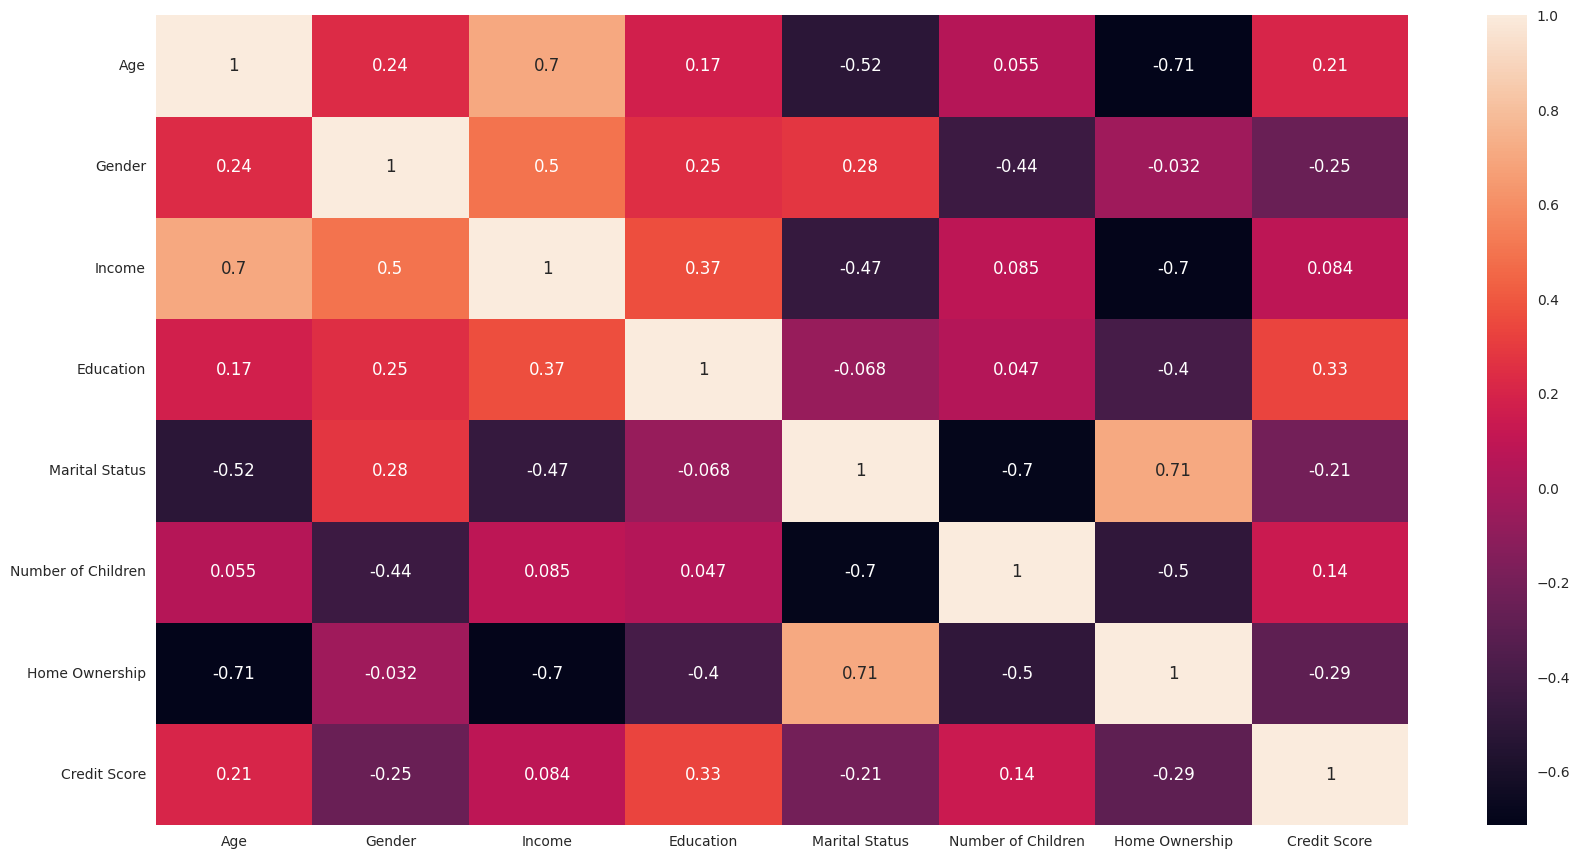

In [30]:
# Set the size of figure to 12 by 10.
plt.figure(figsize=(18,10))

sns.heatmap(df.corr(), annot = True)

# 7. Class Distributions 

In [32]:
# Count the number of instances in each class
class_counts = df['Credit Score'].value_counts()

# Print the class distribution
print('Class distribution:')
print(class_counts)

Class distribution:
1    113
0     36
2     15
Name: Credit Score, dtype: int64


# SMOTE

In [33]:
X = df.drop('Credit Score', axis = 1)
y = df['Credit Score']
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
sm = SMOTE(random_state=42)

# Fit SMOTE to training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Print class distribution of original and resampled data
print('Class distribution before resampling:', y_train.value_counts())
print('Class distribution after resampling:', y_train_res.value_counts())

Class distribution before resampling: 1    90
0    31
2    10
Name: Credit Score, dtype: int64
Class distribution after resampling: 1    90
0    90
2    90
Name: Credit Score, dtype: int64


# Other EDA Suggestions

In [36]:
data_cleaning_suggestions(df)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nullpercent,NuniquePercent,dtype,Nuniques,Nulls,Least num. of categories,Data cleaning improvement suggestions
Age,0.000000,17.682927,int64,29,0,0,
Gender,0.000000,1.219512,int64,2,0,0,
Income,0.000000,31.707317,int64,52,0,0,
Education,0.000000,3.048780,int64,5,0,0,
Marital Status,0.000000,1.219512,int64,2,0,0,
Number of Children,0.000000,2.439024,int64,4,0,0,
Home Ownership,0.000000,1.219512,int64,2,0,0,
Credit Score,0.000000,1.829268,int64,3,0,0,


# Visualizations
---

# 1. Pair Plot

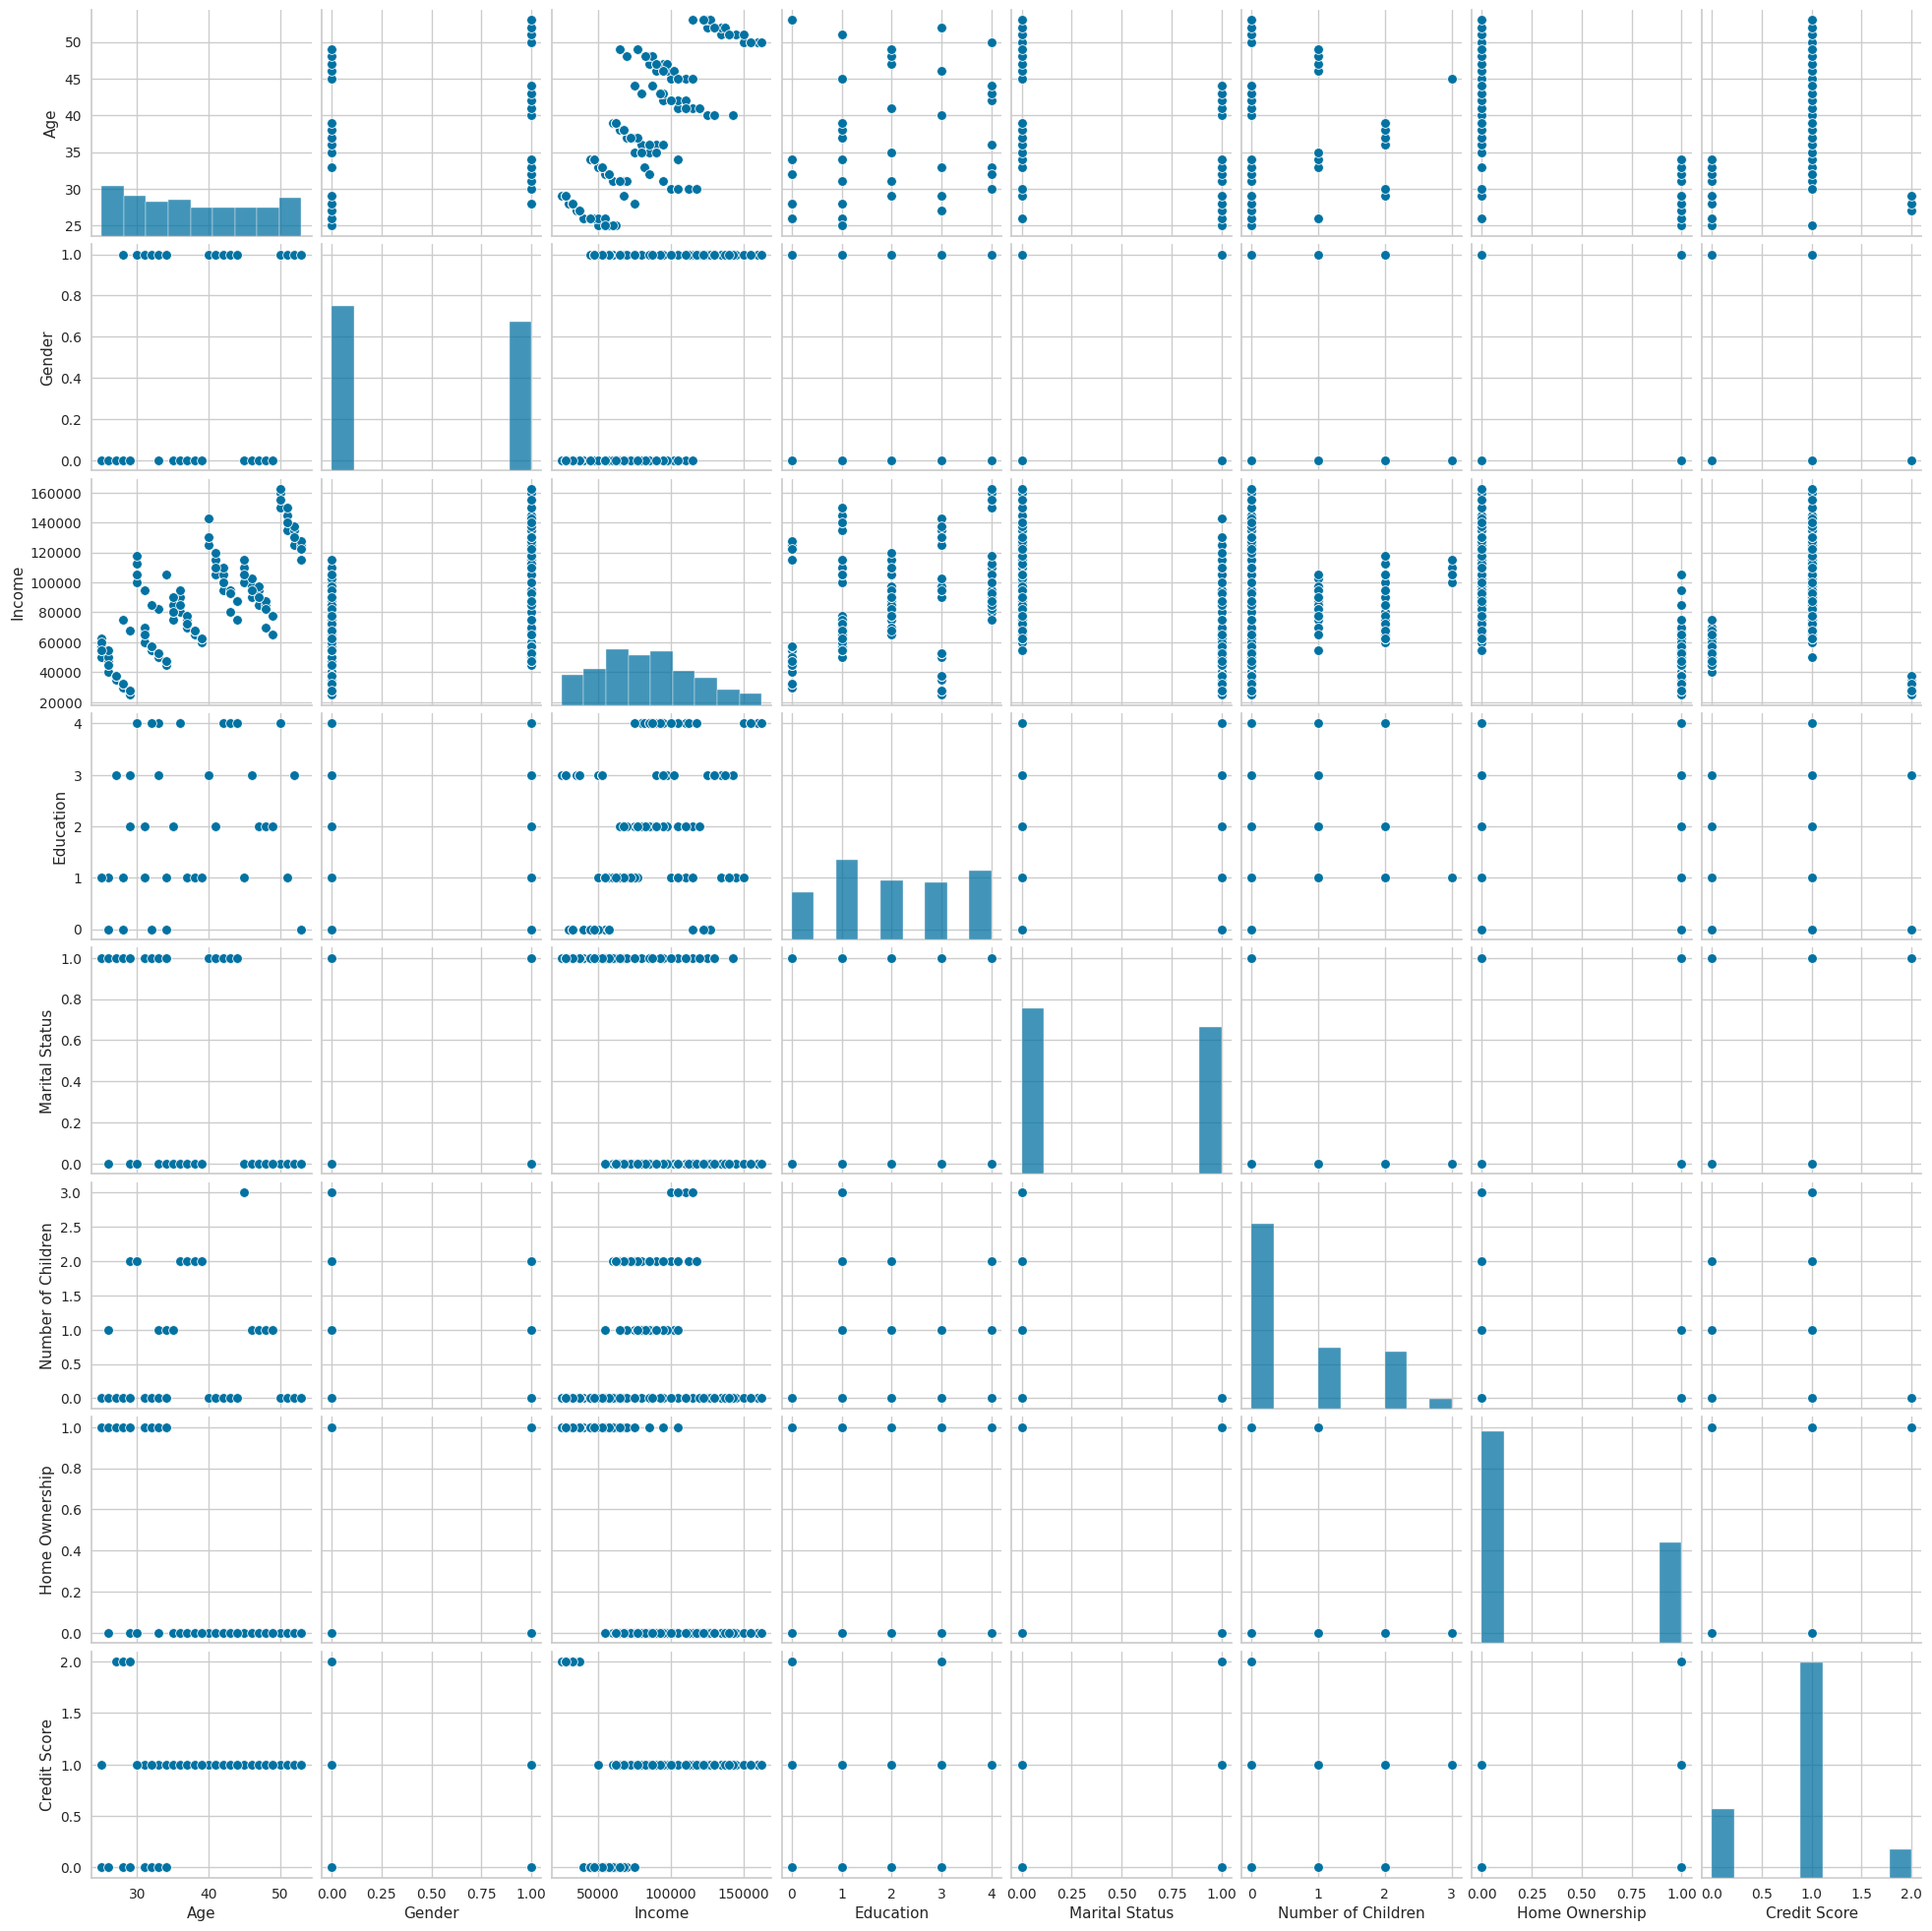

In [35]:
sns.pairplot(df)

# 2. Pie Chart

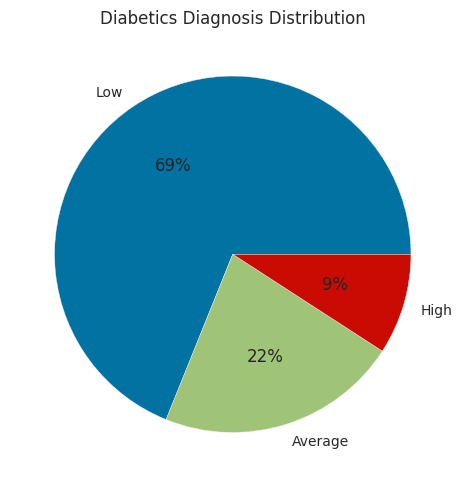

In [37]:
# Count the number of instances in each class
class_counts = df['Credit Score'].value_counts()

# Create a list of labels
labels = ["Low", "Average", "High"]

# Create a list of values
values = class_counts.values

# Plot the pie chart
plt.pie(values, labels=labels, autopct="%1.0f%%")

# Add a title
plt.title("Diabetics Diagnosis Distribution")

# Show the plot
plt.show()

# 3. Null Plot

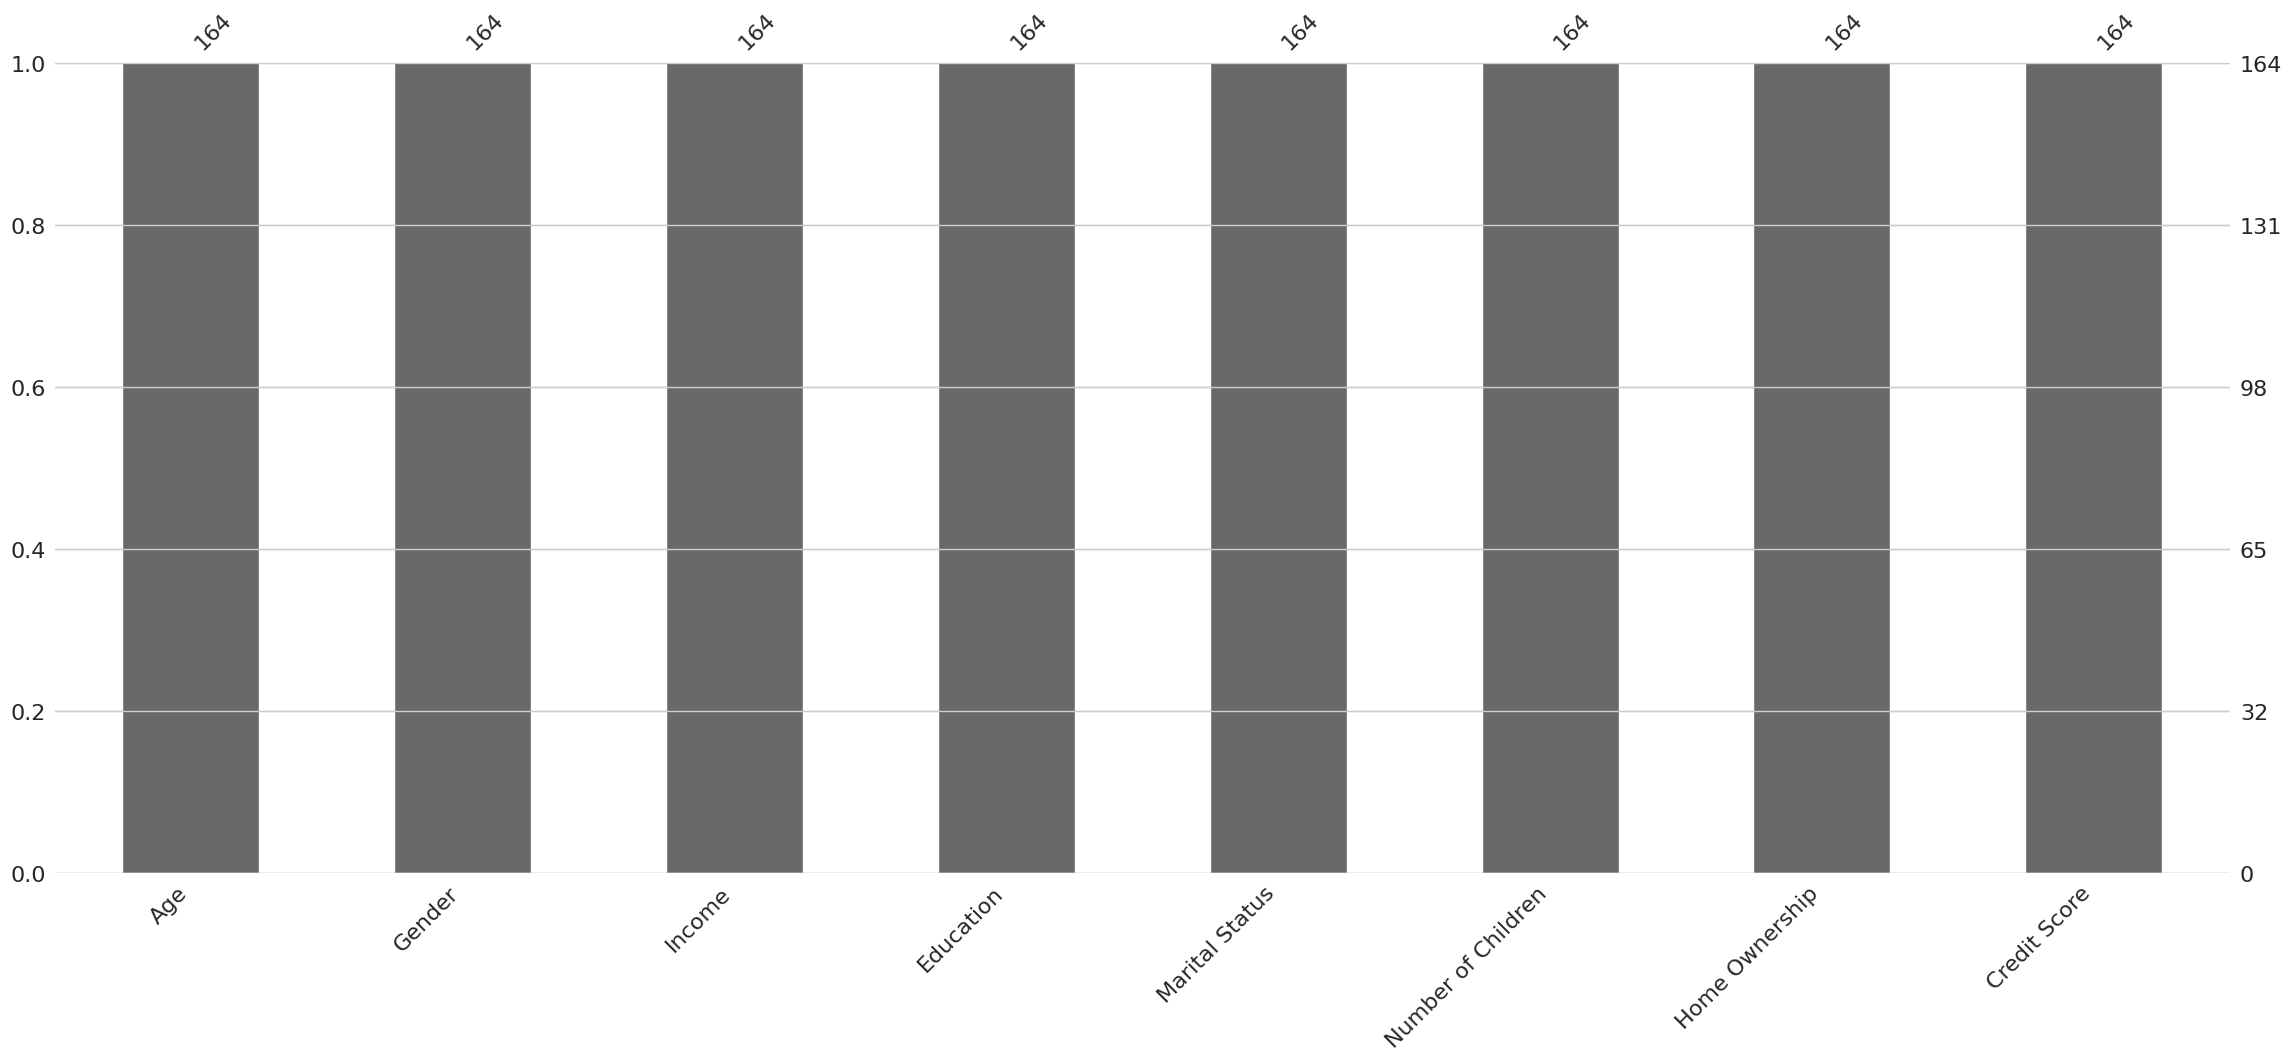

In [38]:
import missingno as msno
# Null count analysis
null_plot = msno.bar(df)

# 4. Other Important Plots

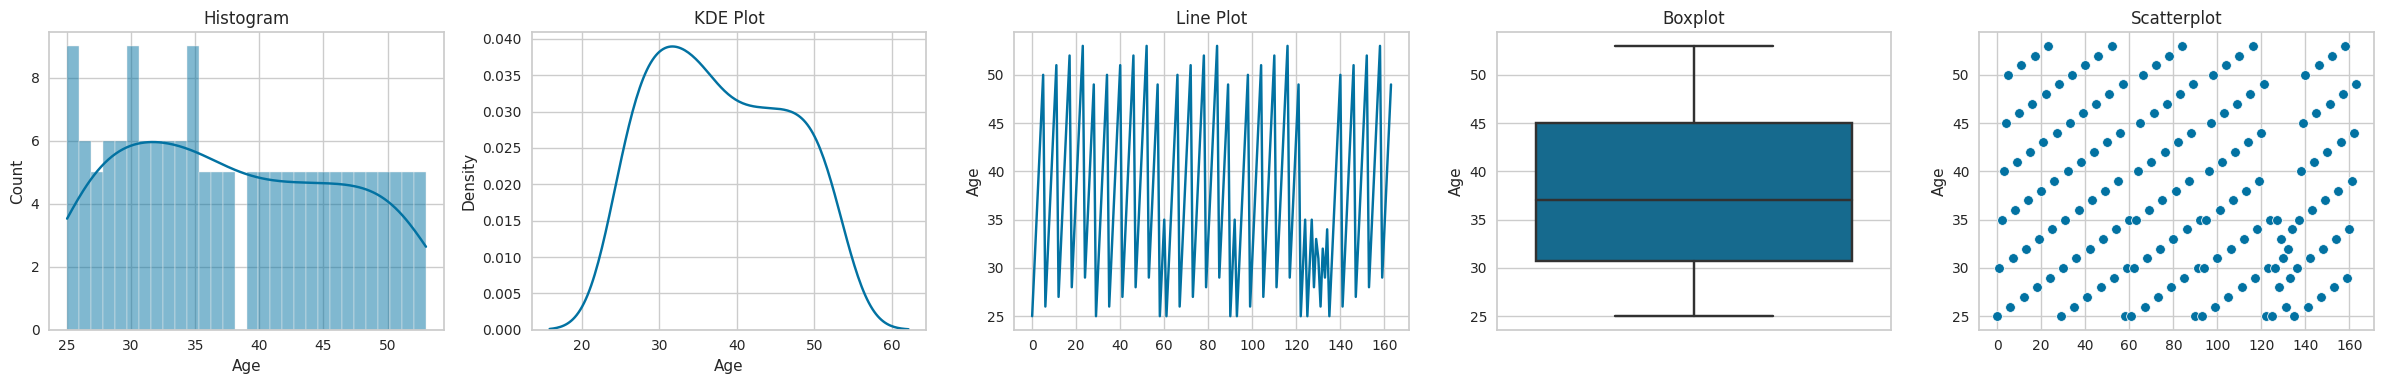

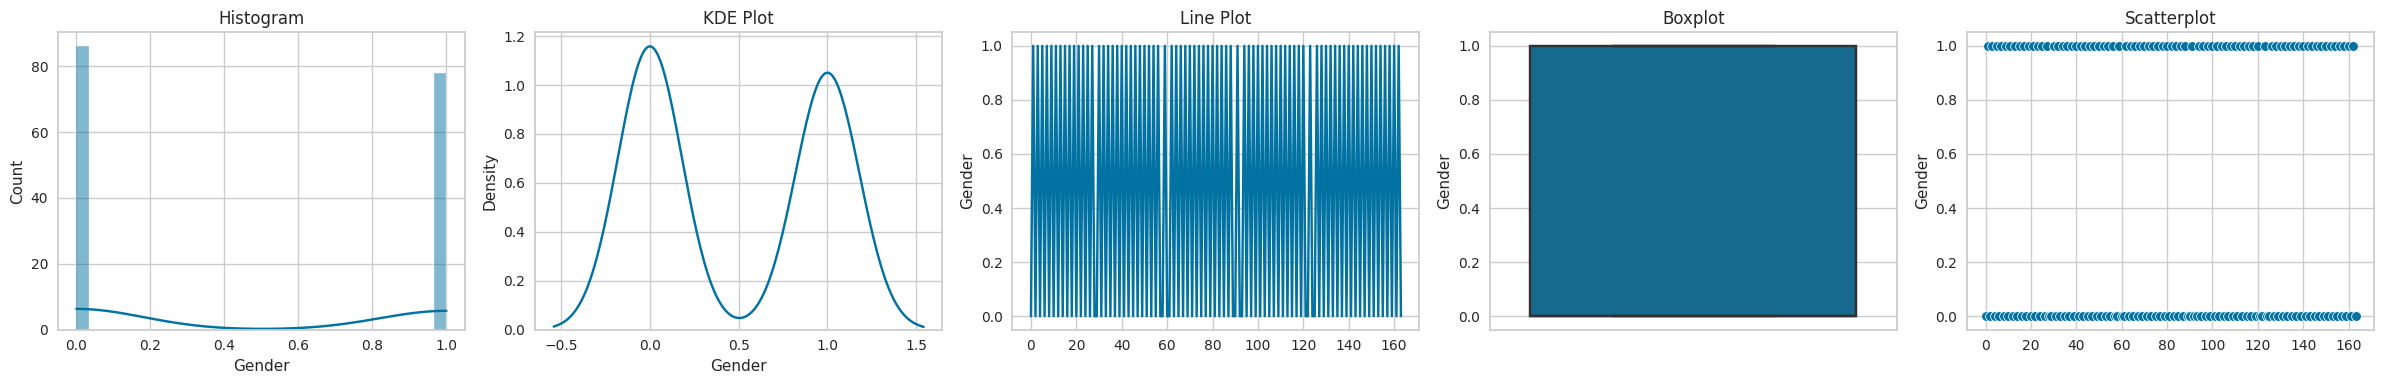

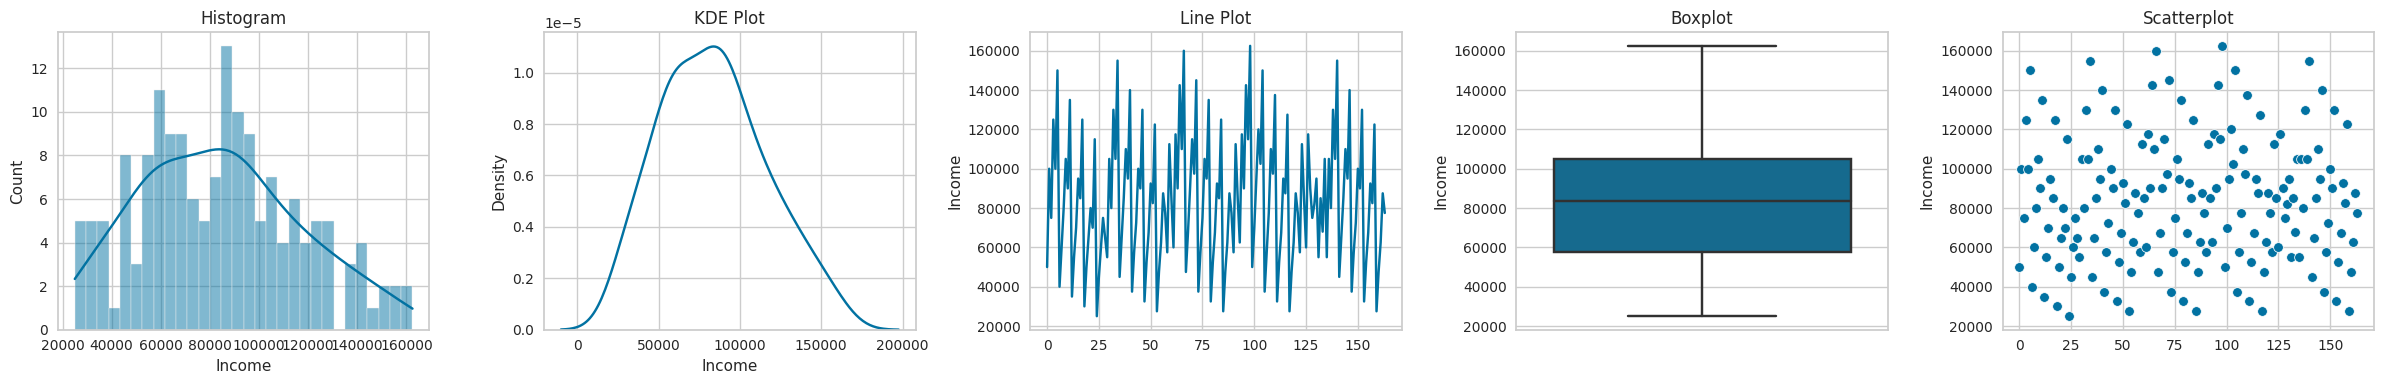

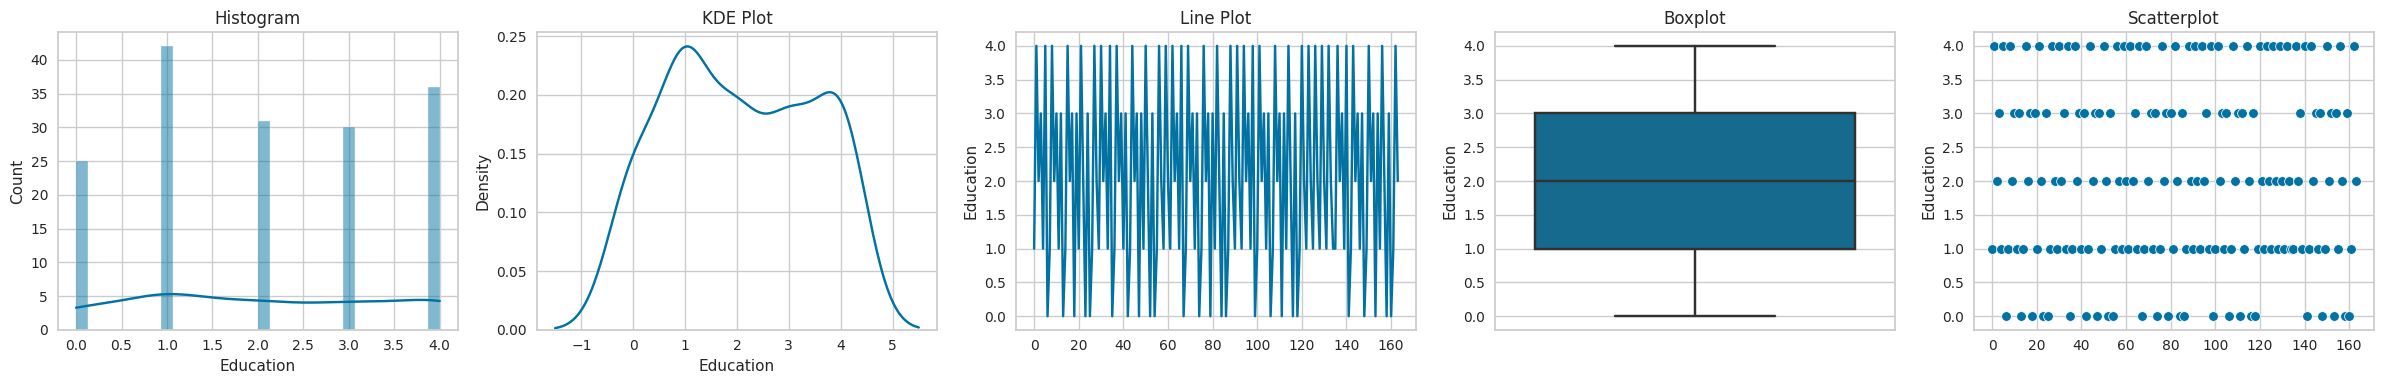

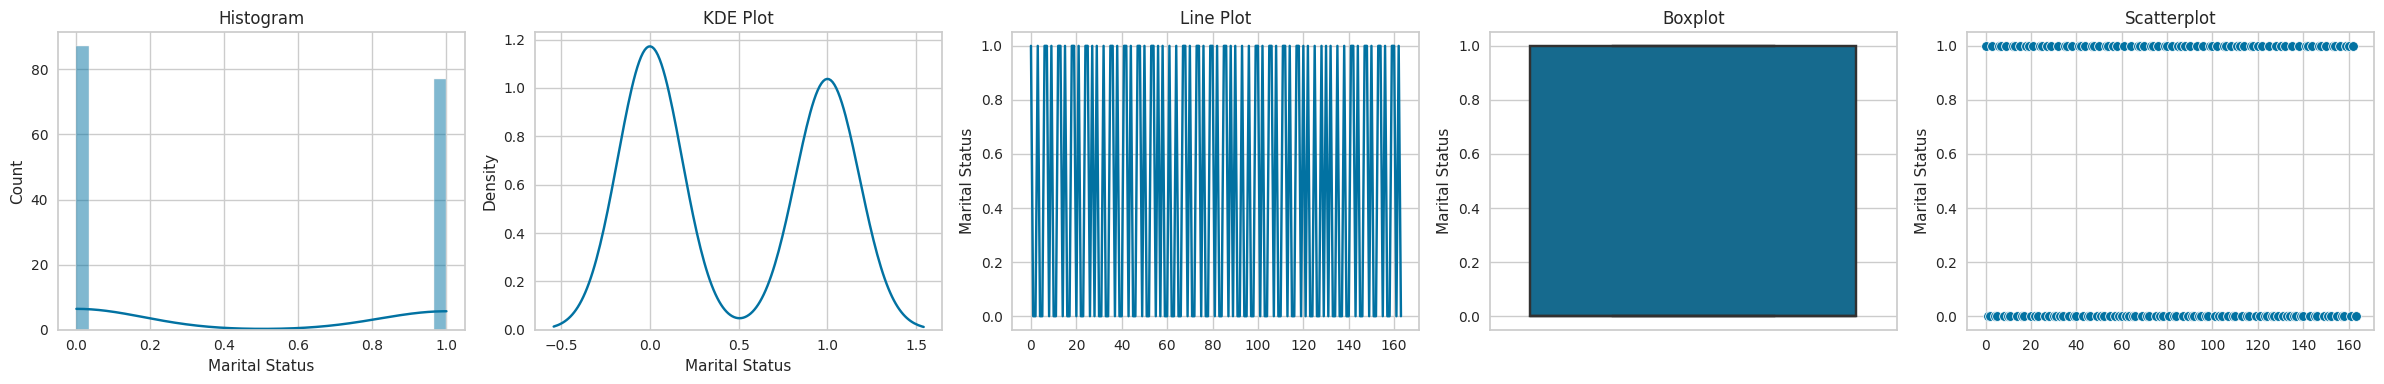

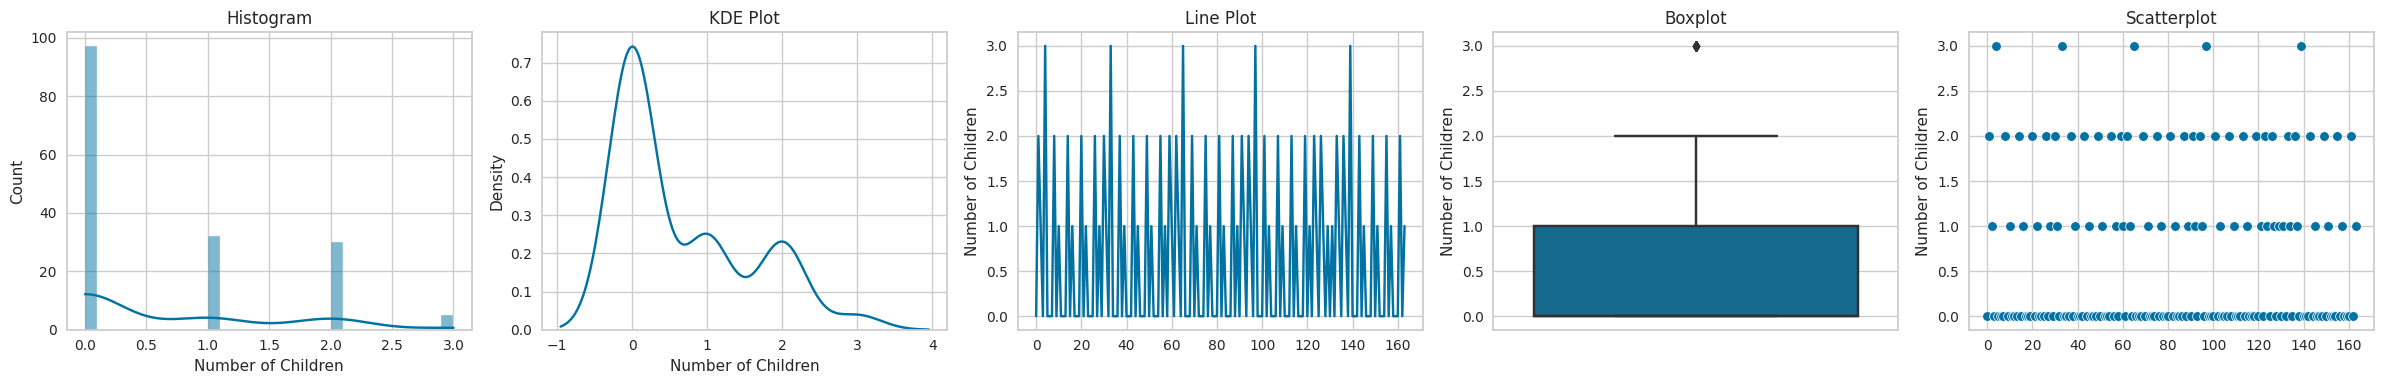

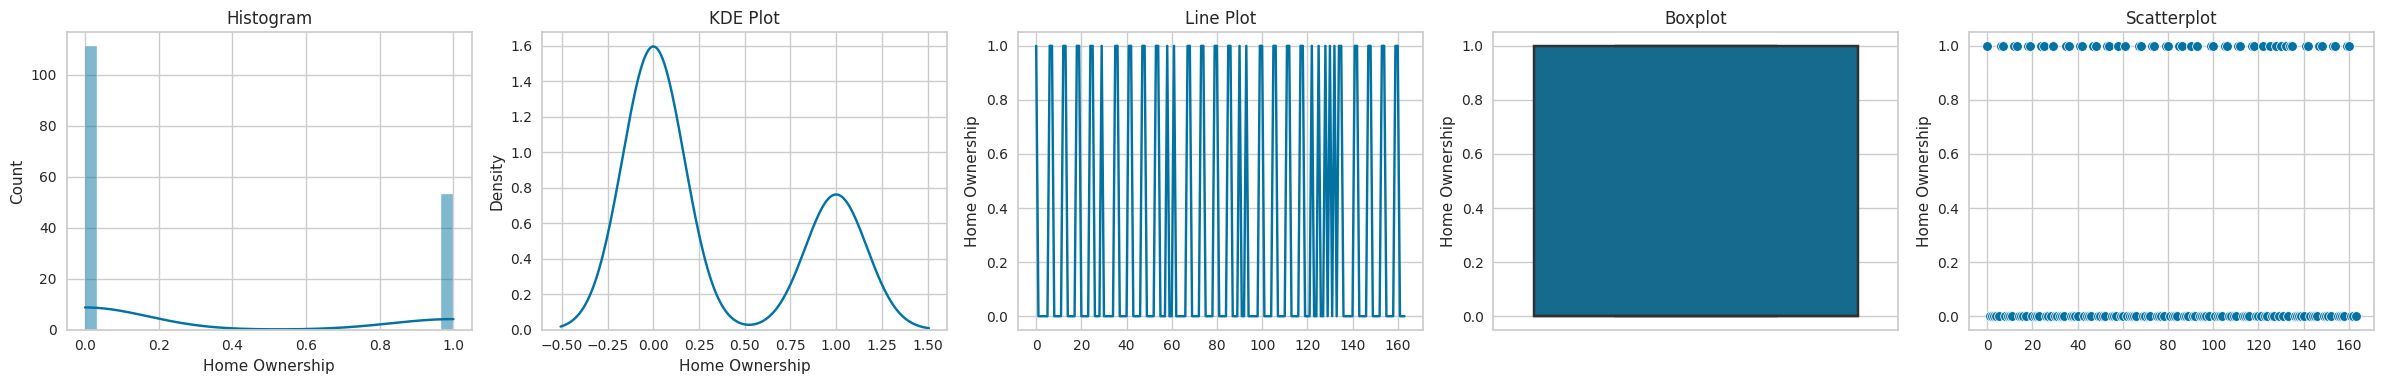

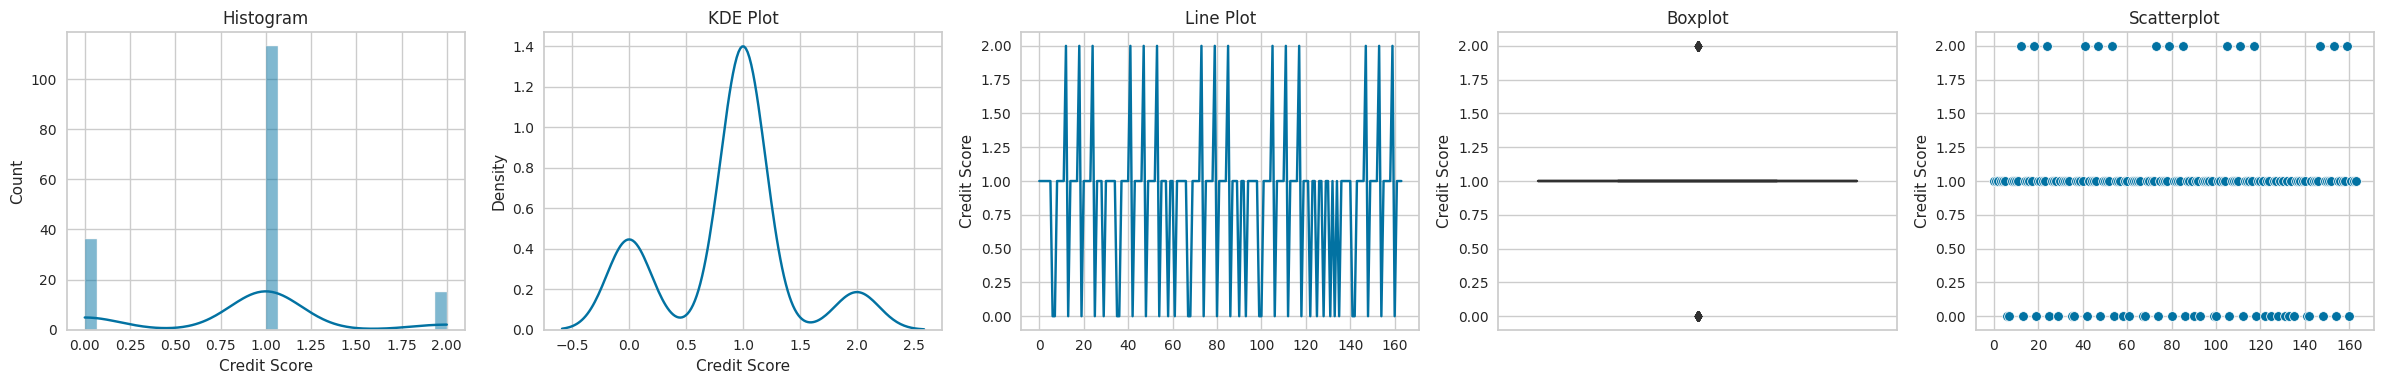

In [39]:
def plots(df, variable):
  if df[variable].dtype != object:
    # define figure size
    fig, ax = plt.subplots(1, 5, figsize=(24, 4))
    
    # histogram
    sns.histplot(df[variable], bins=30, kde=True, ax=ax[0])
    ax[0].set_title('Histogram')
    
    # KDE plot
    sns.kdeplot(df[variable], ax=ax[1])
    ax[1].set_title('KDE Plot')
    
    # Line plot
    sns.lineplot(df[variable], ax=ax[2])
    ax[2].set_title('Line Plot')
    
    # boxplot
    sns.boxplot(y=df[variable], ax=ax[3])
    ax[3].set_title('Boxplot')
    
    # scatterplot
    sns.scatterplot(x=df.index, y=df[variable], ax=ax[4])
    ax[4].set_title('Scatterplot')
    
    plt.tight_layout()
    plt.show()

for i in df.columns:
    plots(df ,i)

# ML Modelling
---

In [41]:
# combine X_train_res and y_train_res
train_data = pd.concat([X_train_res, y_train_res], axis=1)

from pycaret.classification import *
s = setup(data=train_data, target='Credit Score', session_id=123, normalize=True)

,Description,Value
0,Session id,123
1,Target,Credit Score
2,Target type,Multiclass
3,Original data shape,"(270, 8)"
4,Transformed data shape,"(270, 8)"
5,Transformed train set shape,"(189, 8)"
6,Transformed test set shape,"(81, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


# 1. Comparing Models

In [42]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9789,0.9840,0.9789,0.9818,0.9787,0.9683,0.9698,0.0800
rf,Random Forest Classifier,0.9789,0.9956,0.9789,0.9818,0.9788,0.9683,0.9698,0.3210
gbc,Gradient Boosting Classifier,0.9789,0.9946,0.9789,0.9818,0.9788,0.9683,0.9698,0.4530
et,Extra Trees Classifier,0.9789,0.9963,0.9789,0.9818,0.9788,0.9683,0.9698,0.2940
catboost,CatBoost Classifier,0.9789,0.9950,0.9789,0.9818,0.9788,0.9683,0.9698,1.3650
lr,Logistic Regression,0.9737,0.9900,0.9737,0.9773,0.9735,0.9604,0.9623,0.4580
dt,Decision Tree Classifier,0.9737,0.9801,0.9737,0.9773,0.9735,0.9604,0.9623,0.0540
xgboost,Extreme Gradient Boosting,0.9737,0.9920,0.9737,0.9773,0.9735,0.9604,0.9623,0.0920
lightgbm,Light Gradient Boosting Machine,0.9737,0.9924,0.9737,0.9773,0.9735,0.9604,0.9623,0.3650
svm,SVM - Linear Kernel,0.9684,0.0000,0.9684,0.9722,0.9682,0.9525,0.9547,0.0440


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

# 2. KNN Model

In [44]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9474,0.9583,0.9474,0.9539,0.9467,0.9205,0.9244
1,0.9474,0.9583,0.9474,0.9539,0.9467,0.9205,0.9244
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9474,0.9615,0.9474,0.9549,0.9470,0.9208,0.9247
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9474,0.9615,0.9474,0.9549,0.9470,0.9208,0.9247
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [46]:
preds = predict_model(knn)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9753,0.9907,0.9753,0.9770,0.9753,0.9630,0.9638


In [47]:
preds

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score,prediction_label,prediction_score
140,29,0,47500,0,1,0,1,0,0,1.0
268,27,0,32785,0,1,0,1,2,2,1.0
228,27,0,37500,3,1,0,1,2,2,1.0
205,28,0,32500,0,1,0,1,2,2,1.0
103,43,1,92500,4,1,0,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...
11,29,0,68000,2,0,2,0,0,1,1.0
246,28,0,32148,0,1,0,1,2,2,1.0
238,28,0,32037,0,1,0,1,2,2,1.0
85,27,0,37500,3,1,0,1,2,2,1.0


In [48]:
from sklearn.model_selection import cross_val_score

# Evaluate the ensemble model using cross-validation
scores = cross_val_score(knn, X_train_res, y_train_res, cv=20)

In [49]:
preds = predict_model(knn)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9753,0.9907,0.9753,0.9770,0.9753,0.9630,0.9638


# 3. Plots

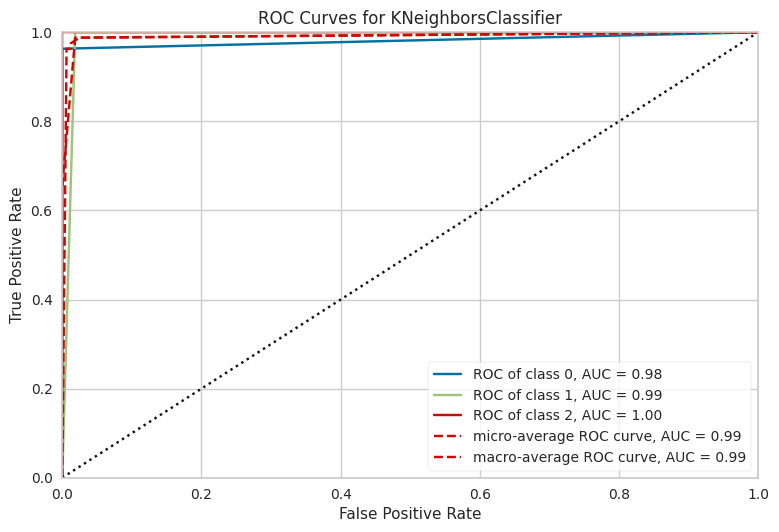

In [50]:
plot_model(knn)

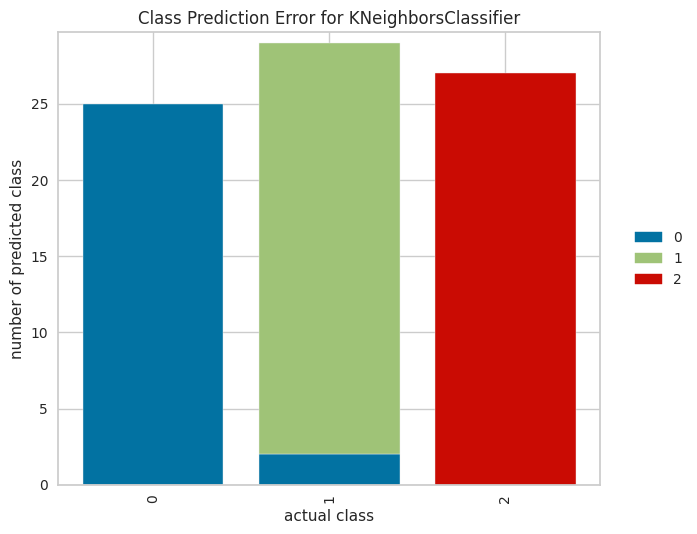

In [52]:
plot_model(knn, plot = 'error')

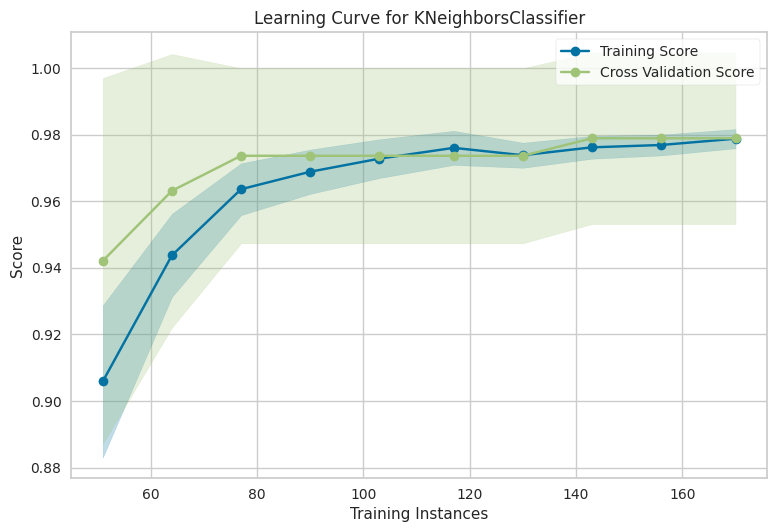

In [54]:
plot_model(knn, plot = 'learning')

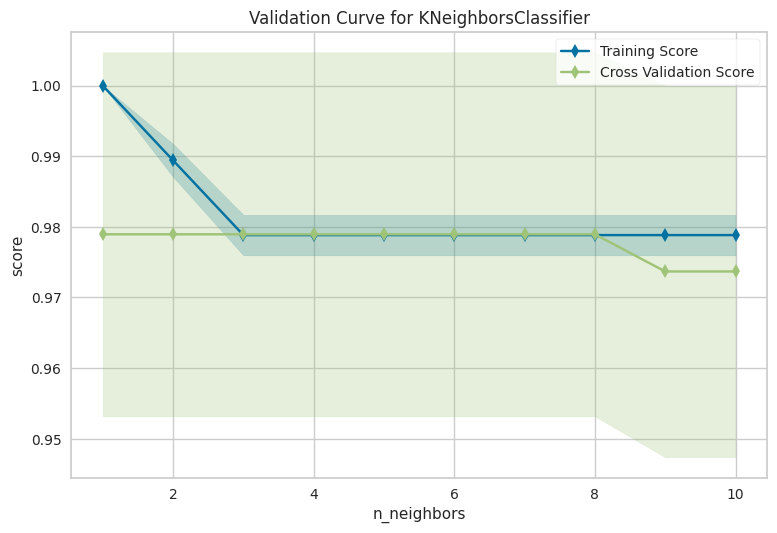

In [55]:
plot_model(knn, plot = 'vc')

# 4. Traditional Approach

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
clf = KNeighborsClassifier()


# Fit the Extra Trees Classifier object to the dataset

clf.fit(X_train_res, y_train_res)

scores = cross_val_score(knn, X_train_res, y_train_res, cv=20)

# Predict the labels for the test data
y_preds = clf.predict(X_test)

# 5. Classification Report

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report")
print(classification_report(y_test, y_preds))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00         5

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



## 100% Accuracy

# 6. Confusion Matrix

In [61]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_preds))

Confusion Matrix:
[[ 5  0  0]
 [ 0 23  0]
 [ 0  0  5]]


# Thank You
---